In [1]:
import yfinance as yahoo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Buscamos la composición actual de la cartera del Indice Rofex 20 en https://www.rofex.com.ar/indiceROFEX20/

Hacemos listado de las acciones y cantidades de la misma que componen la cartera

We look for the current composition of Rofex 20 Index at their web page

Make a list of stocks tickets and quantities of each

In [2]:
merval = ['ALUA', 'BBAR', 'BMA', 'BYMA', 'CEPU', 'COME', 'CRES', 'CVH',
       'GGAL', 'LOMA', 'MIRG', 'PAMP', 'SUPV', 'TECO2', 'TGNO4', 'TGSU2',
       'TRAN', 'TXAR', 'VALO', 'YPFD']

ponderaciones = [ 64.026921,  16.292535,  26.509177,   6.027362,  85.921043,
       200.189866,  25.615255,   2.669259,  91.054145,  18.755399,
         1.6798  ,  93.392315,  23.551531,   7.854211,   6.984776,
        15.809485,  16.735256,  66.98404 ,  66.653312,  15.243066]

In [18]:
mervalBA = [m + '.BA' for m in merval] # add '.BA' to the end of all list elements to get them at yahoo finance

Descargamos la data necesaria y graficamos el retorno de los activos

We obtain the data needed and plot it

[*********************100%***********************]  20 of 20 completed


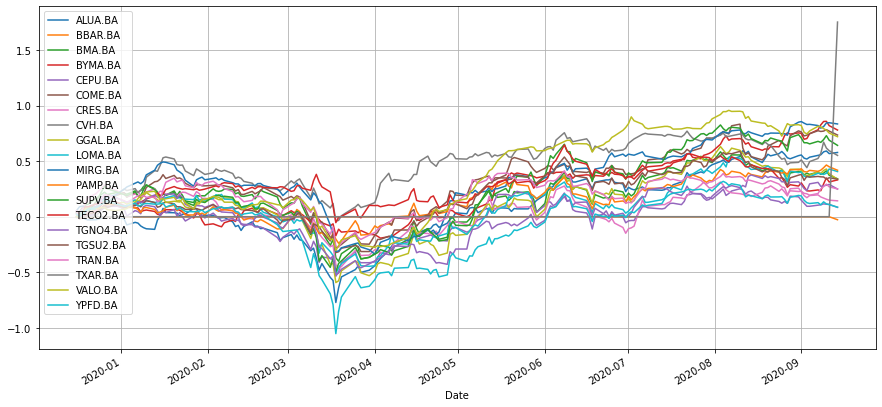

In [4]:
data = yahoo.download(mervalBA, period="180d")['Adj Close'].fillna(method='ffill')

da = data.pct_change().cumsum().plot(figsize=(15,7))
da.grid()

Hacemos DataFrame para las cantidades de cada activo

We make a DataFrame about all the quantities of each asset

In [9]:
cantidades = pd.DataFrame(index=data.columns)
cantidades['ponderaciones'] = ponderaciones
cantidades['porcentaje'] = cantidades['ponderaciones'] / sum(cantidades['ponderaciones'])
cantidades

,ponderaciones,porcentaje
ALUA.BA,64.026921,0.075153
BBAR.BA,16.292535,0.019124
BMA.BA,26.509177,0.031116
BYMA.BA,6.027362,0.007075
CEPU.BA,85.921043,0.100852
COME.BA,200.189866,0.234979
CRES.BA,25.615255,0.030067
CVH.BA,2.669259,0.003133
GGAL.BA,91.054145,0.106877
LOMA.BA,18.755399,0.022015


Generamos el indice y lo graficamos

Generate the index and plot it

Divisor:  [[60597.28213097]]


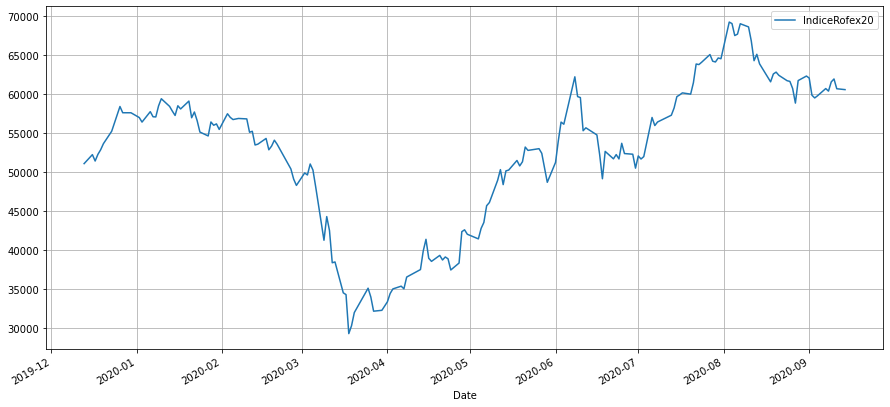

In [16]:
rofex = pd.DataFrame(index=data.index)
rofex['IndiceRofex20'] = (data * cantidades['ponderaciones']).T.sum()
Divisor = rofex.tail(1).values

print('Divisor: ', Divisor)

Rofex20 = rofex.plot(figsize=(15,7))
Rofex20.grid()

Make a Pie Chart

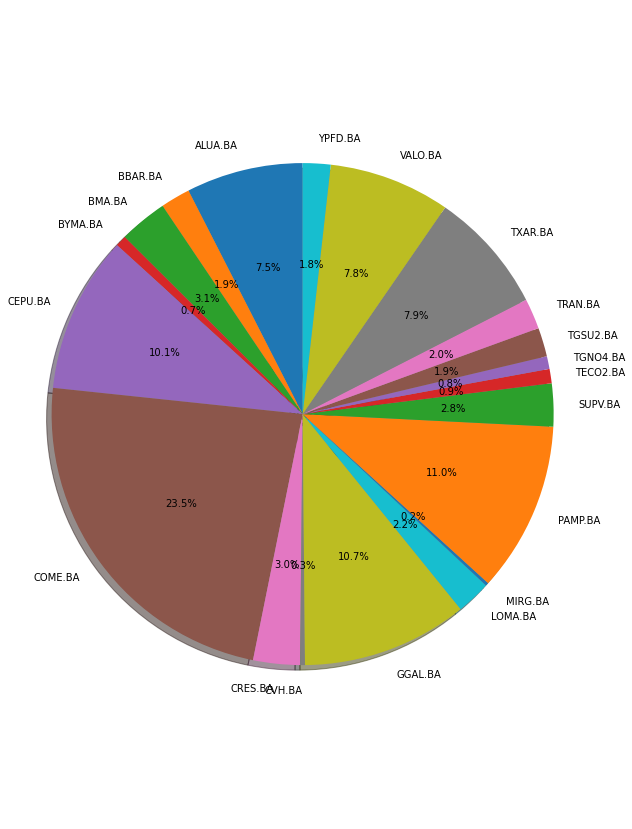

In [17]:
labels = list(cantidades.index)
sizes = (cantidades.porcentaje.values)

fig3, ax3 = plt.subplots(figsize=(10,15))
ax3.pie(sizes, labels=labels,autopct='%1.1f%%',
       shadow=True, startangle=90)
ax3.axis('equal')

plt.show()